In [1]:
from matplotlib import pyplot as plt
import os
import pandas as pd
import bioframe as bf
import numpy as np

In [2]:
plt.rcParams["font.family"] = "Arial Narrow"

In [3]:
ddir = '../../data/ComplementaryData/H3K27ac/degron/'
tdir = '../../data/SupplementaryTables/'
gdir = '../../data/ComplementaryData/'

In [4]:
time = '1h'

# Load data

In [5]:
def split_coord(pos):
    chrom, pos = pos.split(":")
    chrom = chrom.replace("chr", "")
    try:
        b, e = pos.split('-')
    except ValueError:
        b = e  = pos
    b = int(b)
    e = int(e)
    return pd.Series((chrom, b, e))

## load all genes

In [6]:
pwd

'/home/fransua/Projects/Monica_p53/scripts/p53/figures/Figure_7'

In [7]:
promoters = pd.read_csv(os.path.join(gdir, 'promoter_coordinates.txt'), 
                        sep='\t')

In [8]:
promoters

,chr,promoter_start,promoter_end,strand,ensembl_gene_id
0,1,845815,847015,+,ENSG00000230699
1,1,839214,840414,+,ENSG00000272438
2,1,848551,849751,+,ENSG00000241180
3,1,859260,860460,+,ENSG00000187634
4,1,856196,857396,-,ENSG00000223764
...,...,...,...,...,...
29074,Y,21180773,21181973,-,ENSG00000252766
29075,Y,21728199,21729399,+,ENSG00000131002
29076,Y,21906625,21907825,-,ENSG00000012817
29077,Y,22736611,22737811,+,ENSG00000198692


## load target genes

In [9]:
alldf = pd.read_csv(os.path.join(tdir, "SupplementaryTable_IntegrationPCHiC.csv"), 
                    sep='\t')

In [10]:
alldf

,Comparison,p53Target,Ensg,GeneID,p53,TargetRegion,InteractionBait,InteractionOtherEnd,InteractionDynamism,EnrichedInGeneSet,p53EnsgGenomicDistance,H3K27acLog2FCp53,H3K27acLog2FCensg,H3K27acLog2FCenhancer,ExprLog2FCensg
0,Nut1h.vs.Nut0h,enhancer,ENSG00000222888,AC012467.1,3:53295826-53296048,3:53295801-53296141,3:53278994-53304604,3:53915522-53924632,gained,NaN,620759,0.918023,0.743529,0.918023,NaN
1,Nut1h.vs.Nut0h,enhancer,ENSG00000214184,AC012487.2,2:109061744-109061966,2:109060788-109062423,2:109061063-109066640,2:109144635-109152181,maintained,NaN,89197,0.447567,1.111372,0.571948,0.666304
2,Nut1h.vs.Nut0h,enhancer,ENSG00000179066,AC020907.1,19:35613962-35614184,19:35613666-35616224,19:35590055-35605734,19:35607798-35627441,gained,NaN,17600,0.982424,0.088625,0.703425,NaN
3,Nut1h.vs.Nut0h,enhancer,ENSG00000243243,AC073130.3,7:115924554-115924776,7:115924204-115925258,7:115924625-115929514,7:115967531-115969615,maintained,NaN,43685,0.910726,1.415161,1.110392,3.929697
4,Nut1h.vs.Nut0h,enhancer,ENSG00000237753,AC079922.3,2:113450219-113450441,2:113448129-113451605,2:113402487-113405754,2:113449093-113452250,maintained,PSMB5_TARGET_GENES,46663,1.189046,0.540793,0.934471,0.100269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,Nut10h.vs.Nut0h,promoter,ENSG00000124571,XPO5,6:43543873-43544095,6:43543612-43544812,NaN,NaN,NaN,HOXC13_TARGET_GENES,0,1.090630,1.090630,NaN,-0.226007
633,Nut10h.vs.Nut0h,promoter,ENSG00000039319,ZFYVE16,5:79702825-79703047,5:79702832-79704032,NaN,NaN,NaN,NaN,0,0.580119,0.580119,NaN,0.668920
634,Nut10h.vs.Nut0h,promoter,ENSG00000174306,ZHX3,20:39946296-39946518,20:39946112-39947312,NaN,NaN,NaN,NaN,0,0.446416,0.481269,NaN,0.195498
635,Nut10h.vs.Nut0h,promoter,ENSG00000163848,ZNF148,3:125094143-125094365,3:125093998-125095198,NaN,NaN,NaN,ZHANG_BREAST_CANCER_PROGENITORS_UP,0,0.454725,0.454725,NaN,-0.118949


In [11]:
alldf.columns

Index(['Comparison', 'p53Target', 'Ensg', 'GeneID', 'p53', 'TargetRegion',
       'InteractionBait', 'InteractionOtherEnd', 'InteractionDynamism',
       'EnrichedInGeneSet', 'p53EnsgGenomicDistance', 'H3K27acLog2FCp53',
       'H3K27acLog2FCensg', 'H3K27acLog2FCenhancer', 'ExprLog2FCensg'],
      dtype='object')

In [12]:
target_genes = alldf[(alldf['p53Target'] == 'enhancer') & (alldf['Comparison'] == f'Nut{time}.vs.Nut0h')].drop_duplicates(subset='Ensg', keep="first")[
    ["Ensg", "InteractionBait"]]

In [13]:
target_genes[['chrom', 'start', 'end']] = target_genes['InteractionBait'].apply(split_coord)

In [14]:
bf_target_genes = bf.from_any(target_genes[["chrom", "start", "end", "Ensg"]])

In [15]:
promoters = bf.from_any(promoters.rename(
    columns={'chr': 'chrom', 'promoter_start': 'start', 'promoter_end': 'end'}))

### Define target genes and Control genes

In [16]:
tg_genes = set(bf_target_genes['Ensg'])

In [17]:
tg_promoters = promoters[promoters['ensembl_gene_id'].isin(tg_genes)]

In [18]:
bg_promoters = promoters[~promoters['ensembl_gene_id'].isin(tg_genes)]
# bg_promoters = promoters.copy()

## load H3K27ac

In [19]:
k27KD1h = pd.read_csv(os.path.join(ddir, 'DifferentialPeaks_H3K27ac_KDNutlin1h_KDDMSO.txt'), sep='\t')

In [20]:
k27WT1h = pd.read_csv(os.path.join(ddir, 'DifferentialPeaks_H3K27ac_Nutlin1h_DMSO.txt'), sep='\t')

In [21]:
k27KD1h

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,regions
0,17.921647,0.237561,0.684123,0.347249,0.728405,0.807709,chr1:10003
1,26.692795,0.178786,0.603187,0.296402,0.766923,0.837098,chr1:10004-10010
2,223.082237,0.201213,0.334799,0.600997,0.547842,0.660433,chr1:10011-10440
3,30.675646,0.026620,0.572049,0.046534,0.962885,0.975676,chr1:10441-10463
4,21.573282,0.015846,0.646399,0.024514,0.980442,0.987090,chr1:10464-10466
...,...,...,...,...,...,...,...
262284,20.692149,1.040039,0.661515,1.572208,0.115902,0.216871,chrY:13369746-13369793
262285,223.783173,0.729245,0.333750,2.185005,0.028888,0.078635,chrY:13369794-13371123
262286,20.420345,1.193677,0.673796,1.771570,0.076466,0.160688,chrY:13371124-13371129
262287,20.503166,1.526323,0.675801,2.258539,0.023912,0.068358,chrY:13371130-13371192


In [22]:
k27KD1h[['chrom', 'start', 'end']] = k27KD1h['regions'].apply(split_coord)

In [23]:
k27WT1h[['chrom', 'start', 'end']] = k27WT1h['regions'].apply(split_coord)

In [24]:
k27KD1h.columns

Index(['baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj',
       'regions', 'chrom', 'start', 'end'],
      dtype='object')

In [25]:
bf_k27KD1h = bf.from_any(k27KD1h[
    ["chrom", "start", "end", 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
]
                        )

In [26]:
bf_k27WT1h = bf.from_any(k27WT1h[
    ["chrom", "start", "end", 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj']
]
                        )

### Remove NaN from 1h-0h comparison 

In [27]:
bf_k27KD1h = bf_k27KD1h[~bf_k27KD1h['log2FoldChange'].isna()]
bf_k27KD1h = bf_k27KD1h[~bf_k27KD1h['padj'].isna()]

In [28]:
bf_k27WT1h = bf_k27WT1h[~bf_k27WT1h['log2FoldChange'].isna()]
bf_k27WT1h = bf_k27WT1h[~bf_k27WT1h['padj'].isna()]

# Get average H3K27ac signal in promoters (overlapping coordinates)

In [29]:
bg_KD = bf.overlap(bg_promoters, bf_k27KD1h)

In [30]:
bg_KD[~bg_KD['log2FoldChange_'].isna()]

,chrom,start,end,strand,ensembl_gene_id,chrom_,start_,end_,baseMean_,log2FoldChange_,lfcSE_,stat_,pvalue_,padj_
1,1,839214,840414,+,ENSG00000272438,1,839279,839348,13.966398,1.226203,0.828033,1.480863,1.386431e-01,0.246398
2,1,839214,840414,+,ENSG00000272438,1,839349,839591,34.142699,1.603400,0.540216,2.968069,2.996774e-03,0.013973
3,1,839214,840414,+,ENSG00000272438,1,839592,840370,197.377889,1.565025,0.351926,4.447034,8.706389e-06,0.000115
4,1,839214,840414,+,ENSG00000272438,1,840371,840593,50.558489,1.925330,0.485913,3.962294,7.423303e-05,0.000689
6,1,859260,860460,+,ENSG00000187634,1,859183,859359,14.903669,1.089592,0.740370,1.471686,1.411058e-01,0.249562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48227,X,154298695,154299895,+,ENSG00000185515,X,154298734,154299464,340.716135,1.469752,0.335963,4.374746,1.215742e-05,0.000153
48228,X,154298695,154299895,+,ENSG00000185515,X,154299465,154299783,50.394971,0.975751,0.894385,1.090974,2.752844e-01,0.403284
48229,X,154298695,154299895,+,ENSG00000185515,X,154299784,154300432,242.893923,1.762333,0.350148,5.033105,4.825974e-07,0.000011
48234,X,154996474,154997674,+,ENSG00000168939,X,154996883,154997198,26.418947,1.628477,0.620514,2.624401,8.680150e-03,0.031832


In [31]:
bg_WT = bf.overlap(bg_promoters, bf_k27WT1h)

In [32]:
tg_KD = bf.overlap(tg_promoters, bf_k27KD1h)

In [33]:
tg_WT = bf.overlap(tg_promoters, bf_k27WT1h)

In [34]:
vals_bg_KD = np.array([v for v in bg_KD.groupby('ensembl_gene_id', as_index=False)["log2FoldChange_"].agg(
    {"log2FoldChange_": np.nanmean})["log2FoldChange_"] if np.isfinite(v)])

In [35]:
vals_bg_WT = np.array([v for v in bg_WT.groupby('ensembl_gene_id', as_index=False)["log2FoldChange_"].agg(
    {"log2FoldChange_": np.nanmean})["log2FoldChange_"] if np.isfinite(v)])

In [36]:
vals_tg_KD = np.array([v for v in tg_KD.groupby('ensembl_gene_id', as_index=False)["log2FoldChange_"].agg(
    {"log2FoldChange_": np.nanmean})["log2FoldChange_"] if np.isfinite(v)])

In [37]:
vals_tg_WT = np.array([v for v in tg_WT.groupby('ensembl_gene_id', as_index=False)["log2FoldChange_"].agg(
    {"log2FoldChange_": np.nanmean})["log2FoldChange_"] if np.isfinite(v)])

In [38]:
len(vals_bg_KD)

13956

In [39]:
len(vals_bg_WT)

14310

In [40]:
len(vals_tg_KD)

184

In [41]:
len(vals_tg_WT)

191

# Plot

In [42]:
from scipy import stats

In [43]:
stats.mannwhitneyu(vals_tg_WT, vals_bg_WT)

MannwhitneyuResult(statistic=1646280.5, pvalue=1.1373948065114666e-06)

In [44]:
stats.mannwhitneyu(vals_tg_KD, vals_bg_KD)

MannwhitneyuResult(statistic=1389557.0, pvalue=0.05489008902051699)

Text(0, 0.5, 'H3K27ac(log2FC)')

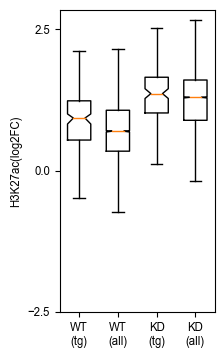

In [45]:
plt.figure(figsize=(2, 4), dpi=100)
plt.boxplot([vals_tg_WT, vals_bg_WT, vals_tg_KD, vals_bg_KD], 
            showfliers=False, notch=True, bootstrap=100, widths=0.6, 
            labels=['WT\n(tg)', 'WT\n(all)', 'KD\n(tg)', 'KD\n(all)'])
plt.yticks([-2.5, 0, 2.5])
plt.ylabel('H3K27ac(log2FC)')

In [46]:
np.nanmean(vals_bg_KD), np.nanmedian(vals_bg_KD)

(1.2003880879230129, 1.2971264033030612)

In [47]:
tg_normKD = (vals_tg_KD - np.nanmean(vals_bg_KD)) / np.nanstd(vals_bg_KD)

In [48]:
tg_normWT = (vals_tg_WT - np.nanmean(vals_bg_WT)) / np.nanstd(vals_bg_WT)

In [49]:
tg_normKD = (vals_tg_KD / np.nanmedian(vals_bg_KD))

In [50]:
tg_normWT = (vals_tg_WT / np.nanmedian(vals_bg_WT))

In [51]:
names = {    
    'WTNut0h' : '0h WT',
    'KDNut0h' : '0h KD' ,
    'WTNut1h' : '1h WT' ,
    'KDNut1h' : '1h KD' ,
    'WTNut10h': '10h WT',
    'KDNut10h': '10h KD',
}

22462.0 3.1701806948539945e-06


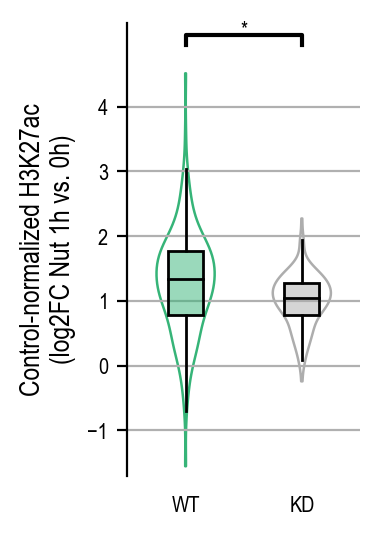

In [52]:
plt.figure(figsize=(1.5, 3), dpi=200)

ax = plt.subplot()

vals = [tg_normWT, tg_normKD]

tests = []
y0 = 4.95
y1 = 5.1
yt = 5.1
positions = [1, 2]

for n, v1 in enumerate(vals[::2]):
    v2 = vals[1 + n * 2]
    r, pv = stats.mannwhitneyu(v1, v2)
    print (r, pv)
#     plt.plot([x0, x1, x1, x0], [n * 2 + 1, n * 2 + 1, n * 2 + 2, n * 2 + 2], color='k')
    plt.plot([positions[n * 2], positions[n * 2], positions[n * 2 + 1],
              positions[n * 2 + 1]], [y0, y1, y1, y0], color='k')
    plt.text(n * 2 + 1.5, yt, '*' if pv < 0.05 else 'ns', ha='center', size=8)
plt.ylim(-1.7, 5.3)

colors = [
    ( 54 / 256, 181 / 256, 120 / 256, 0.5), #  1h WT
    (174 / 256, 174 / 256, 174 / 256, 0.5), #  1h KD
]


bps = plt.boxplot(vals, showfliers=False, patch_artist=True, positions=positions, showcaps=False,
                  boxprops=dict(facecolor='none', color='k'), medianprops=dict(color='k'), widths=0.3)

for n, b in enumerate(bps['boxes']):
    b.set_facecolor(colors[n])

vls = plt.violinplot(vals, vert=True, positions=positions, showextrema=False)
for n, v in enumerate(vls['bodies']):
    v.set_facecolor("None")
    v.set_edgecolor(list(colors[n][:-1]) + [20])
    v.set_linewidth(0.9)
    v.set_alpha(1)

plt.yticks(range(-1, 5))
plt.grid(axis='y')

sample_order = ['WTNut1h', 'KDNut1h']

plt.xticks(positions, [names[s].split()[1] for s in sample_order], size=8)
plt.yticks(size=8)
ax.spines[['right', 'top', 'bottom']].set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)

plt.ylabel('Control-normalized H3K27ac\n(log2FC Nut 1h vs. 0h)')
plt.savefig("../../../../results/degron/fig7C_normh3k27acFC_KD.pdf", dpi=300)

In [53]:
stats.mannwhitneyu(tg_normWT, tg_normKD)

MannwhitneyuResult(statistic=2.2462e+04, pvalue=3.1701806948539945e-06)